<a href="https://colab.research.google.com/github/manyapoojary11/myprojects/blob/main/loan_approval_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = {
    'Income': [25000,40000,50000,60000,20000,80000,30000,70000,45000,55000,
               35000,90000,100000,65000,48000,72000,52000,31000,27000,88000],

    'Loan_Amount': [10000,20000,25000,30000,15000,40000,12000,35000,22000,27000,
                    18000,45000,50000,28000,21000,33000,26000,14000,13000,42000],

    'Credit_Score': [600,650,700,750,500,800,550,720,680,710,
                     640,820,850,730,690,760,705,580,560,810],

    'Approved': [0,1,1,1,0,1,0,1,1,1,
                 0,1,1,1,1,1,1,0,0,1]
}

df = pd.DataFrame(data)

print(df.head())

   Income  Loan_Amount  Credit_Score  Approved
0   25000        10000           600         0
1   40000        20000           650         1
2   50000        25000           700         1
3   60000        30000           750         1
4   20000        15000           500         0


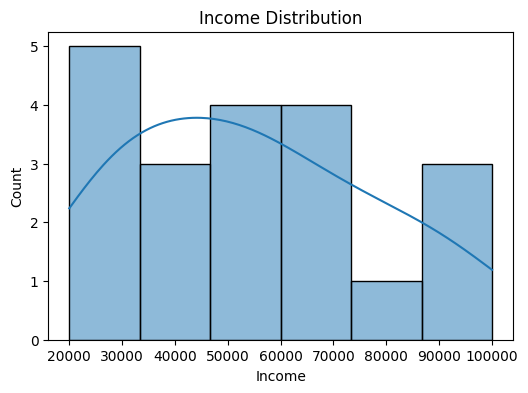

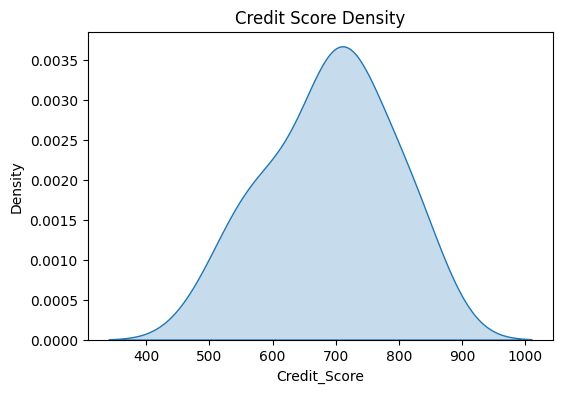

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(df['Income'], kde=True)
plt.title("Income Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.kdeplot(df['Credit_Score'], fill=True)
plt.title("Credit Score Density")
plt.show()

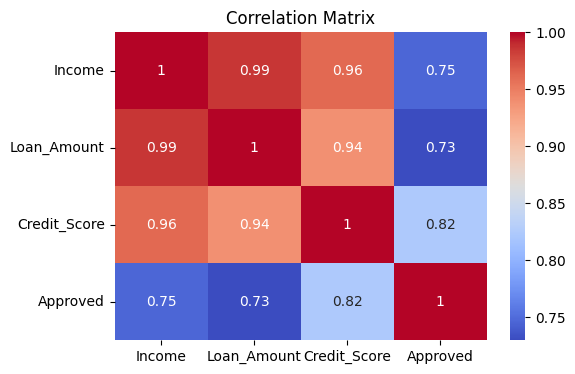

In [5]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [6]:
X = df[['Income','Loan_Amount','Credit_Score']]
y = df['Approved']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 1.0


In [9]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Decision Tree Accuracy: 1.0


In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

KNN Accuracy: 1.0


In [11]:
dt_params = {
    'max_depth':[None,2,3,4,5],
    'min_samples_split':[2,3,4]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=3)
dt_grid.fit(X_train, y_train)

print("Best DT Params:", dt_grid.best_params_)

Best DT Params: {'max_depth': None, 'min_samples_split': 2}


In [12]:
knn_params = {
    'n_neighbors':[1,3,5,7],
    'weights':['uniform','distance']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3)
knn_grid.fit(X_train, y_train)

print("Best KNN Params:", knn_grid.best_params_)

Best KNN Params: {'n_neighbors': 1, 'weights': 'uniform'}


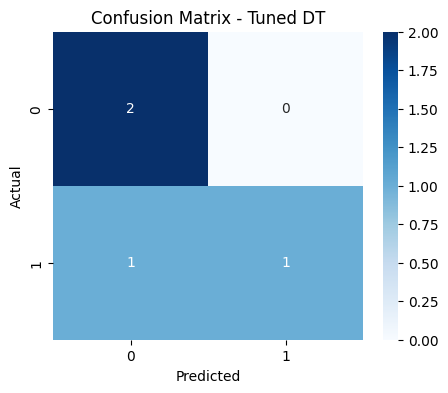

In [13]:
best_dt = dt_grid.best_estimator_
best_pred = best_dt.predict(X_test)

cm = confusion_matrix(y_test, best_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tuned DT")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
models = {
    "Logistic Regression": accuracy_score(y_test, lr_pred),
    "Decision Tree": accuracy_score(y_test, dt_pred),
    "KNN": accuracy_score(y_test, knn_pred),
    "Tuned DT": accuracy_score(y_test, best_pred)
}

print("\nModel Comparison:")
for key, value in models.items():
    print(key, ":", value)


Model Comparison:
Logistic Regression : 1.0
Decision Tree : 1.0
KNN : 1.0
Tuned DT : 0.75


In [17]:
income = 60000
loan_amount = 25000
credit_score = 720

new_data = pd.DataFrame([[income, loan_amount, credit_score]],
                        columns=['Income', 'Loan_Amount', 'Credit_Score'])

new_data = scaler.transform(new_data)

result = lr.predict(new_data)

if result[0] == 1:
    print("Loan Approved")
else:
    print("Loan Not Approved")


Loan Approved
